# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

# Luckyanchuk Bogdan BSE-213


### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [3]:
def find_sum(a: int, d: int, N: int) -> float:
    result = 0
    for x in range(N):
        result += 1/(a + x*d)
    return result

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [15]:
def check_palindrome(N):
    new_number = 0
    old_number = N
    while old_number != 0:
        x = old_number % 10
        old_number //= 10
        new_number *= 10
        new_number += x
    return new_number == N


for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [16]:
def find_palindromes(N):
    i = 42
    count = 0
    palindromes = []
    while count < N:
        if (check_palindrome(i)):
            palindromes.append(i)
            count += 1
        i += 1
    return palindromes


print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [776]:
from random import randint


def find_median(a, b, c):
    max = a
    min = b
    if a < b:
        min = a
        max = b
    if c < min:
        min = c
    if c > max:
        max = c
    result = a+b+c - min - max
    return result


for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

-25 49 -86 	Median: -25
-61 38 56 	Median: 38
-13 95 -4 	Median: -4
-40 7 -59 	Median: -40
-7 45 58 	Median: 45
-28 16 -14 	Median: -14
-14 -25 -91 	Median: -25
-97 -80 93 	Median: -80
-30 -23 93 	Median: -23
82 -80 -12 	Median: -12


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [39]:
my_array = np.random.normal(0, 1, 12)
my_array *= 15/np.sum(my_array)
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 15.000000000000002


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [42]:
def calculate_manhattan(a, b):
    result = a - b
    result = np.absolute(result)
    distance = result.sum()
    return distance


def calculate_euclidean(a, b):
    result = a - b
    result = np.power(result, 2)
    distance = result.sum()
    distance = np.sqrt(distance)
    return distance


def calculate_chebyshev(a, b):
    result = a - b
    result = np.absolute(result)
    distance = np.max(result)
    return distance


def calculate_cosine(a, b):
    result = np.dot(a, b)
    a_dot = np.sqrt(np.dot(a, a))
    b_dot = np.sqrt(np.dot(b, b))
    distance = 1 - result/(a_dot*b_dot)
    return distance

In [45]:
a = np.random.randint(low=-100, high=100, size=100)
b = np.random.randint(low=-100, high=100, size=100)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 5727
Euclidean distance: 721.070731620692
Chebyshev distance: 198
Cosine distance: 0.8543441000836242


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [46]:
def transform(array):
    min = -6
    max = 10
    transformed_array = (array - array.min())/(array.max() - array.min())
    transformed_array *= (max - min)
    transformed_array += min
    return transformed_array

In [47]:
my_array = np.random.randint(low=1, high=1000, size=42)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -6.0
Max: 10.0
Array:
[ 4.02531646 -0.61603376 -1.89873418  0.43037975 -0.90295359  6.42194093
 -0.37974684  6.16877637  4.85232068  4.54852321 -2.91139241  3.24894515
  1.81434599  8.37974684  4.8185654  -6.          1.52742616  1.8649789
  2.75949367 -2.03375527 10.         -4.092827    4.54852321  2.21940928
  1.51054852 -5.00421941 -4.17721519  2.84388186  4.24472574 -4.71729958
 -5.72995781  6.1350211  -2.52320675  3.35021097  5.71308017 -0.9535865
 10.         -3.5021097  -0.02531646 -2.23628692  6.82700422  6.4556962 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [48]:
my_array = np.random.randint(low=-12, high=5, size=(10, 3))
selected_column = np.argmin(my_array) % my_array.shape[1]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[-12  -3  -1]
 [-11  -5  -4]
 [ -2   1   3]
 [-11  -1   1]
 [ -7   1   3]
 [ -3   1  -9]
 [ -2   2   2]
 [  2  -3   2]
 [ -8   4  -7]
 [-11  -1  -8]]
Selected column: 0


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [386]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.50611664 0.34174775 0.87407692 0.87802138 0.44415094        nan
        nan 0.88599629        nan        nan]


In [495]:
def replace_missing(arr):
    mediana = np.nanmedian(arr)
    arr[np.isnan(arr)] = mediana
    array_without_missing = arr
    print('Median: ', mediana)
    return array_without_missing

In [496]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)
print(idx)

Median:  0.6900967815830863
Array with no missing values:
[0.50611664 0.34174775 0.87407692 0.87802138 0.44415094 0.69009678
 0.69009678 0.88599629 0.69009678 0.69009678]
[5 6 9 8]


**Answer:** here

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [52]:
def stats_channel(X):
    mediana = ([np.median(X[:, :, 0]), np.median(
        X[:, :, 1]), np.median(X[:, :, 2])])
    std = ([np.std(X[:, :, 0]), np.std(X[:, :, 1]), np.std(X[:, :, 2])])
    return mediana, std

In [53]:
n = 19
m = 23

X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

([-2.0, -1.0, -2.0], [5.560707592520229, 5.650216913542807, 5.453638973184836])


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [54]:
def get_unique_values(X):
    result = np.unique(X, axis=1)
    return result

In [55]:
n = 20
X = np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:',)
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[5 5 5]
  [4 5 5]
  [5 4 4]]

 [[4 5 4]
  [5 5 4]
  [4 5 4]]

 [[4 4 4]
  [4 4 4]
  [5 4 4]]

 [[4 4 5]
  [5 5 4]
  [4 4 4]]

 [[5 4 4]
  [4 5 5]
  [4 5 4]]

 [[5 4 5]
  [4 5 4]
  [4 4 4]]

 [[5 5 4]
  [4 5 4]
  [5 4 5]]

 [[4 4 4]
  [5 5 4]
  [4 4 4]]

 [[5 5 4]
  [4 5 5]
  [5 5 4]]

 [[5 5 4]
  [5 4 5]
  [5 4 5]]

 [[5 4 4]
  [4 4 4]
  [4 4 5]]

 [[5 5 4]
  [5 5 4]
  [5 4 5]]

 [[4 5 4]
  [4 4 5]
  [4 4 4]]

 [[5 5 5]
  [5 4 5]
  [5 5 5]]

 [[4 4 4]
  [4 4 4]
  [5 4 5]]

 [[5 4 5]
  [5 5 4]
  [5 5 5]]

 [[4 4 4]
  [5 4 4]
  [4 4 5]]

 [[4 4 5]
  [5 5 5]
  [4 5 5]]

 [[5 5 5]
  [5 5 5]
  [4 5 5]]

 [[5 4 4]
  [4 5 4]
  [5 5 4]]]
Unique :


array([[[4, 5, 5],
        [5, 4, 4],
        [5, 5, 5]],

       [[5, 5, 4],
        [4, 5, 4],
        [4, 5, 4]],

       [[4, 4, 4],
        [5, 4, 4],
        [4, 4, 4]],

       [[5, 5, 4],
        [4, 4, 4],
        [4, 4, 5]],

       [[4, 5, 5],
        [4, 5, 4],
        [5, 4, 4]],

       [[4, 5, 4],
        [4, 4, 4],
        [5, 4, 5]],

       [[4, 5, 4],
        [5, 4, 5],
        [5, 5, 4]],

       [[5, 5, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 5, 5],
        [5, 5, 4],
        [5, 5, 4]],

       [[5, 4, 5],
        [5, 4, 5],
        [5, 5, 4]],

       [[4, 4, 4],
        [4, 4, 5],
        [5, 4, 4]],

       [[5, 5, 4],
        [5, 4, 5],
        [5, 5, 4]],

       [[4, 4, 5],
        [4, 4, 4],
        [4, 5, 4]],

       [[5, 4, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[4, 4, 4],
        [5, 4, 5],
        [4, 4, 4]],

       [[5, 5, 4],
        [5, 5, 5],
        [5, 4, 5]],

       [[5, 4, 4],
        [4, 4, 5],
        [4, 4, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [9]:
dataset = pd.read_csv('titanic.csv', index_col=0)
dataset.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

В столбцах Age, Cabin, Embarked есть пропущенные значения.

In [56]:
dataset.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

Процент выживших пассжиров составляет ≈ 38%, процент погибших ≈ 62%. Следовательно, классы не сбаланcированы.

In [57]:
survived = dataset.Survived.sum()
died = dataset.shape[0] - survived
print(
    f'Percentage of survived passengers: {(survived/dataset.shape[0]).round(2) * 100}%')
print(
    f'Percentage of died passengers: {(died/dataset.shape[0]).round(2)*100}%')

Percentage of survived passengers: 38.0%
Percentage of died passengers: 62.0%


На борту было больше мужчин, чем женщин.

In [58]:
male = len(dataset[dataset["Sex"] == 'male'])
female = dataset.shape[0] - male
print("Males: ", male)
print("Females: ", female)

Males:  577
Females:  314


Наименее популярным портом для посадки явялется Queenstown.

In [59]:
print(dataset.Embarked.value_counts())
print("The least popular port of embarkation is: ",dataset.Embarked.value_counts().idxmin())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
The least popular port of embarkation is:  Q


На титанике было 3 пассажирских класса.

In [60]:
len(dataset.Pclass.unique())

3

Общая средняя цена билета составляет ≈ 32.2, для первого класса ≈  84.15, для второго класса ≈ 20.66, для третьего ≈ 13.68

In [61]:
print("Average ticket fare: ", np.round(dataset.Fare.mean(), 2))
print(np.round(dataset.groupby(['Pclass']).Fare.mean(), 2))

Average ticket fare:  32.2
Pclass
1    84.15
2    20.66
3    13.68
Name: Fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

Минимальный возраст пассажиров составляет 0,42, максимальный - 80.

In [64]:
minimal_age = dataset['Age'].min()
maximum_age = dataset['Age'].max()
print("Minimal age: ", minimal_age)
print("Maximum age: ", maximum_age)

x = ["minimal", "maximum"]
plt.bar(x = dataset, label='Age')
plt.title('Minimal and maximum ages of the passengers')
plt.ylabel('Age')
plt.xlabel('Amount of passengers')
plt.legend()
plt.show()

Minimal age:  0.42
Maximum age:  80.0


TypeError: bar() missing 1 required positional argument: 'height'

Средний возраст среди всех пассажиров 29.7 лет, среди мужчин 30.73, среди женщин 27.92.

Median Age:  29.7
Male median Age:  30.73 Female median Age:  27.92


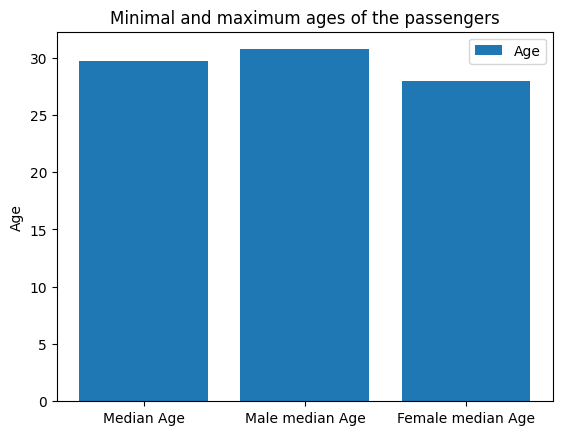

In [133]:
mean_age = dataset.Age.mean()
print("Median Age: ", np.round(mean_age, 2))
female_age, male_age = dataset.groupby(['Sex']).Age.mean()
print("Male median Age: ", np.round(male_age, 2),
      "Female median Age: ", np.round(female_age, 2))

y = [mean_age, male_age, female_age]
x = ["Median Age", "Male median Age", "Female median Age"]
plt.bar(x, y, label='Age')
plt.title('Minimal and maximum ages of the passengers')
plt.ylabel('Age')
plt.legend()
plt.show()

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [63]:
def convertToDict(x):
    dictionary = {}
    key = 'Title'
    for i in x:
        if i. endswith('.'):
            value = i
            break
    dictionary[key] = value
    return dictionary


new_df = dataset.Name.str.split().apply(lambda x: convertToDict(x))
new_df = new_df.apply(pd.Series)
final_df = pd.concat([dataset, new_df], axis=1)

print("Unique Titles:", final_df.Title.unique())
print("Passengers with every title:",len(final_df.Title.unique()))
print("The most popular man's title: ",final_df[final_df["Sex"] == "male"].Title.value_counts().idxmax())
print("The most popular woman's title: ",final_df[final_df["Sex"] == "female"].Title.value_counts().idxmax())


Unique Titles: ['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
Passengers with every title: 17
The most popular man's title:  Mr.
The most popular woman's title:  Miss.


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



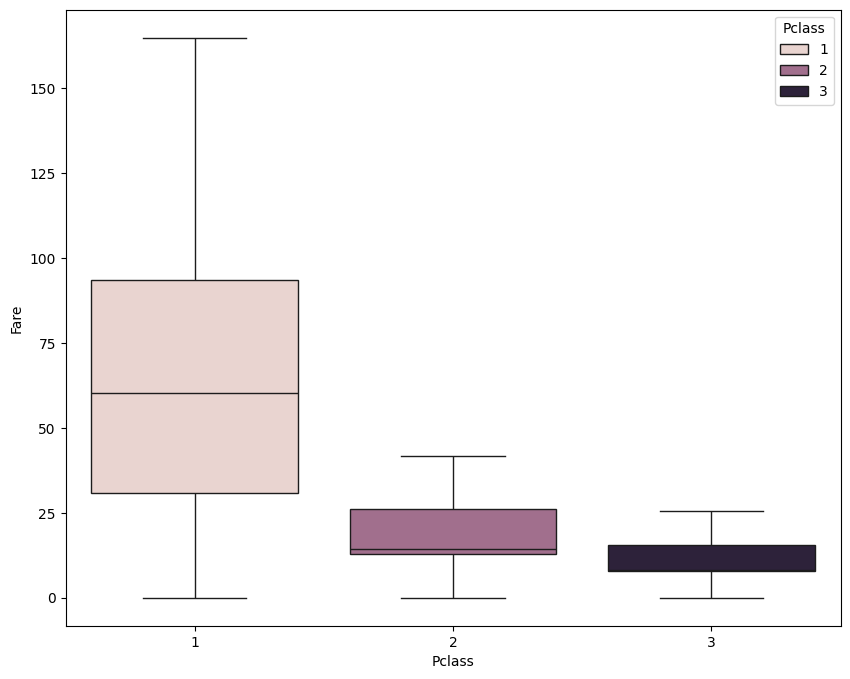

In [75]:
dataset.Pclass.corr(dataset.Fare)
dataset.groupby(['Pclass']).Fare.mean()

plt.figure(figsize=(10, 8))
sns.boxplot(data=dataset, x='Pclass', y='Fare', showfliers=False, hue='Pclass')
plt.show()

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [ ]:
# You code here

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

In [ ]:
# You code here